https://ramhiser.com/post/2018-04-16-building-scikit-learn-pipeline-with-pandas-dataframe/
https://www.kaggle.com/evanmiller/pipelines-gridsearch-awesome-ml-pipelines

In [256]:
import pandas as pd
import numpy as np
import sklearn
import warnings
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
data_path=os.path.join("..",'..','..','DATA')
input_file=os.path.join(data_path,"california_housing","housing_kaggle.csv")

In [258]:
df=pd.read_csv(input_file)

In [259]:
from sklearn.pipeline import Pipeline


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [261]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

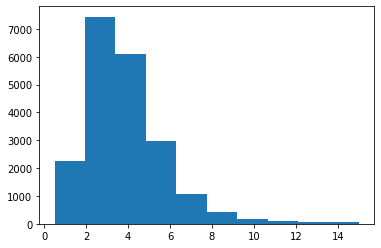

In [262]:
plt.hist(df['median_income'])

In [263]:
#df_int=df.select_dtypes(exclude='object')

In [264]:
#df_int.info()
#int_columns=list(df_int.columns)

In [265]:
#histogram
#correlation matrix
#scatter plot

In [266]:
#create category out of continuous variable
df['income_cat']=pd.cut(df['median_income'],bins=[0,2,3,4,5,7,20,np.inf],labels=[1,2,3,4,5,6,7,])

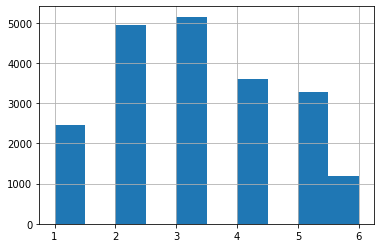

In [267]:
df['income_cat'].hist()

In [268]:
#split the data in .6,.2,.2 ratio
from sklearn.model_selection import StratifiedShuffleSplit

In [269]:
#scatter matrix , heatmap
corr=df.corr()

In [270]:
corr['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD3BE82A20>,
      dtype=object)

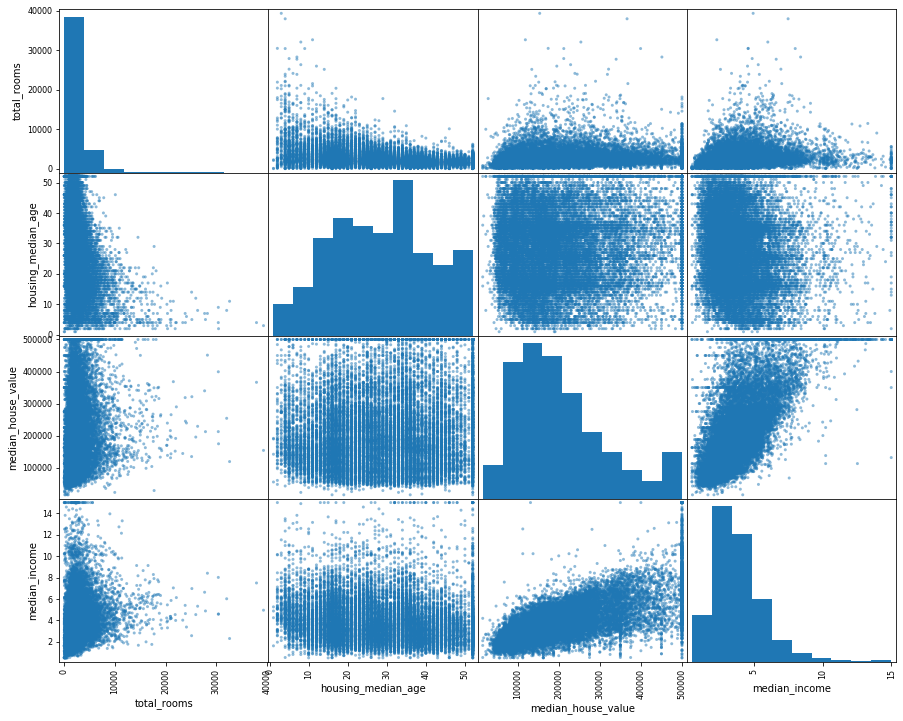

In [271]:
#corelation scatter matrix
from pandas.plotting import scatter_matrix
columns=['total_rooms','housing_median_age','median_house_value','median_income']
scatter_matrix(df[columns],figsize=(15,12))

In [272]:
#seperate numerical and categorical values and  and create pipeline for transformation
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer

In [273]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [274]:
class NewFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
        #self.columns=columns
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if(self.add_bedroom_per_room):
            #rooms=self.columns[0]
            #ouseholds=self.columns[1]
            X['romm_per_hsh']=X['total_rooms']/X['households']
            #room_per_hsh=X[rooms]/X[households]
            #pd.concat(X,room_per_hsh)
        return X
        
    

In [275]:
#attr=NewFeatures(True)

In [276]:
#df1=attr.transform(df)

In [277]:
#df1.info()

In [278]:
from copy import deepcopy

In [279]:
df_int=deepcopy(df.select_dtypes(exclude=['object','category']))

In [280]:
df_int.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [281]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#https://ramhiser.com/post/2018-04-16-building-scikit-learn-pipeline-with-pandas-dataframe/

In [282]:
num_pipeline=Pipeline([('adder',NewFeatures(True)),('imputer',SimpleImputer(strategy='median')),('std_sca',StandardScaler())])

In [283]:
num_pipeline.fit(df_int)

Pipeline(memory=None,
         steps=[('adder', NewFeatures(add_bedroom_per_room=True)),
                ('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('std_sca',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [284]:
df_int1=num_pipeline.transform(df_int)

In [290]:
df_int

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,romm_per_hsh
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513


In [286]:
si=SimpleImputer(strategy='median')

In [287]:
#si.fit(df_int)

In [288]:
#df_int=si.transform(df_int)

In [289]:
#df_int.info()